<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Знакомство-и-изучение-данных" data-toc-modified-id="Знакомство-и-изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство и изучение данных</a></span></li><li><span><a href="#Формализация-задачи-и-план-работы" data-toc-modified-id="Формализация-задачи-и-план-работы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Формализация задачи и план работы</a></span></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li><li><span><a href="#Построение-моделей-линейной-регрессии" data-toc-modified-id="Построение-моделей-линейной-регрессии-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение моделей линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация-и-оценка-RMSE" data-toc-modified-id="Кросс-валидация-и-оценка-RMSE-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Кросс-валидация и оценка RMSE</a></span></li><li><span><a href="#Оценка-среднего-запаса-сырья-(предсказания-на-тестовых-данных)" data-toc-modified-id="Оценка-среднего-запаса-сырья-(предсказания-на-тестовых-данных)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Оценка среднего запаса сырья (предсказания на тестовых данных)</a></span></li><li><span><a href="#RMSE-на-тестовой-выборке" data-toc-modified-id="RMSE-на-тестовой-выборке-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RMSE на тестовой выборке</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчету-прибыли-в-регионах" data-toc-modified-id="Подготовка-к-расчету-прибыли-в-регионах-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка к расчету прибыли в регионах</a></span><ul class="toc-item"><li><span><a href="#Возможности--для-безубыточной-разработки" data-toc-modified-id="Возможности--для-безубыточной-разработки-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Возможности  для безубыточной разработки</a></span></li><li><span><a href="#Расчет-прибыли-с-использованием-модели" data-toc-modified-id="Расчет-прибыли-с-использованием-модели-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Расчет прибыли с использованием модели</a></span></li></ul></li><li><span><a href="#Оценка-вероятности-прибыли-и-рисков--(bootstrap)-в-регионах" data-toc-modified-id="Оценка-вероятности-прибыли-и-рисков--(bootstrap)-в-регионах-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оценка вероятности прибыли и рисков  (bootstrap) в регионах</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Предсказание прибыльного региона нефтедобычи

## Описание проекта


**ПРОБЛЕМА:**

В добывающей компании необходимо принять решение, в каком **из 3-х регионов** бурить новую скважину.

В каждом регионе `10 000 месторождений`, где измерили **качество** нефти в каждой скважине и **объём** её запасов. 

**ЦЕЛЬ ПРОЕКТА:**

Построить модель машинного обучения, которая поможет определить `лучший регион`:

- c **наибольшей прибылью** от добычи нефти
- c учетом оценки `возможных рисков`

В нашем распоряжении `3 датасета` с пробами нефти в каждом из регионов.

---

**ЛИЧНЫЕ ЦЕЛИ:**

- Научиться `интерпретировать качество` моделей с помощью метрики **RMSE**
- На практике связать модели ML с **бизнес-задачами**  
- Применить знания по технике `Bootstrap` для оценки **прибыли** и **рисков**

In [41]:
import numpy as np
import pandas as pd

#Графики
import matplotlib.pyplot as plt
import seaborn as sns

# Модели машинного обучения
from sklearn.linear_model import LinearRegression

# Метрики
from sklearn.metrics import mean_squared_error

#Dummy - baseline классификатор
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, validation_curve, learning_curve,  cross_val_score


In [42]:
# Функции из прошлых проектов

def plot_learning_curve (title, model, features, target, score, train_sizes): 
    
    '''
    Использует встроенную функцию learning_curve
    и рисует кривые валидации на отдельном графике
    '''
    
    train_sizes,train_scores, validation_scores = learning_curve(
                                                estimator =  model,
                                                X = features,                                      
                                                y = target,        
                                                scoring = score,
                                                train_sizes = train_sizes, shuffle=True)                                        
                                              
        
    # метрики качества модели, которые мы получили для обучающих датасетов cv=5
    # вычисляем среднее арифметическое для графика кривой
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel(score, fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    
    plt.show()

## Знакомство и изучение данных

In [43]:
data1 = pd.read_csv("/datasets/geo_data_0.csv") 
data2 = pd.read_csv("/datasets/geo_data_1.csv") 
data3 = pd.read_csv("/datasets/geo_data_2.csv") 

for d in [data1, data2, data3]:
    display(d.head(7))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478


**Вывод 1**

Нам предоставили данные о каждой скважине в регионах:

- `id` — уникальный идентификатор скважины
- `f0, f1, f2` — три признака точек (их значение не разглашают, но специалисты уверяют -  сами признаки значимы)
- `product` — объём запасов в скважине. (!) `тысяч баррелей`

Последний столбец - целевой признак, который мы можем научиться предсказывать.

Сделаем небольшую оценку **для каждого региона**.

In [44]:
for i, data in zip(range(1, 4), [data1, data2, data3]):
    print(f"==> Cкважины в Регионе №{i} <==\n")
    print(f"Количество скважин:{data.shape[0]} \n")
    print(data.describe(), '\n')

==> Cкважины в Регионе №1 <==

Количество скважин:100000 

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347 

==> Cкважины в Регионе №2 <==

Количество скважин:100000 

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576  

- Невооруженным глазом видно, что все признаки скважин f0, f1 и f2 **по-разному распределены** в 3-х регионах. 


- Средние объемы запасов нефти в сважинах также сильно различаются.

Попробуем визуализировать каждый регион!

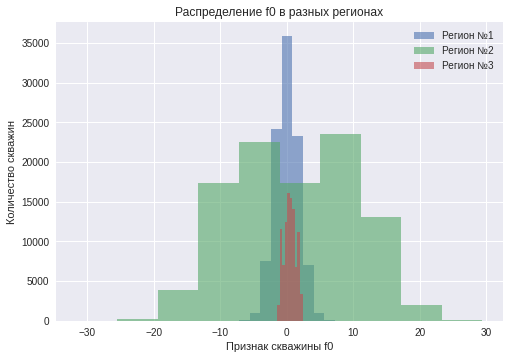

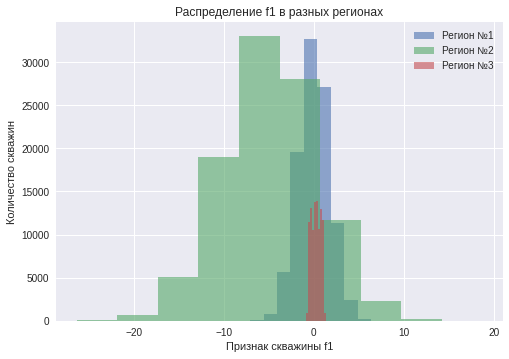

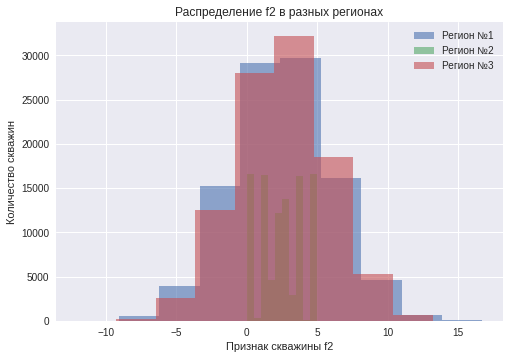

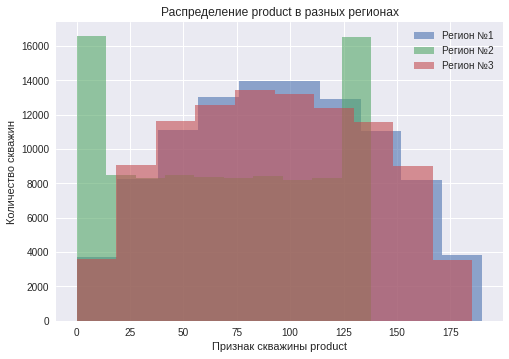

In [45]:
for col in ['f0', 'f1', 'f2', 'product']:   
    fig, ax = plt.subplots()
    
    for data in [data3, data2, data1]:
        data[col].hist(alpha=0.6)   
  
    plt.title(label=f"Распределение {col} в разных регионах")
    plt.xlabel(f"Признак скважины {col}")
    plt.ylabel("Количество скважин")
    ax.legend(["Регион №1", "Регион №2", "Регион №3"])
    plt.show()

**Регион №2** - самый самобытный по своим показателям, перенесем его на отдельный график)

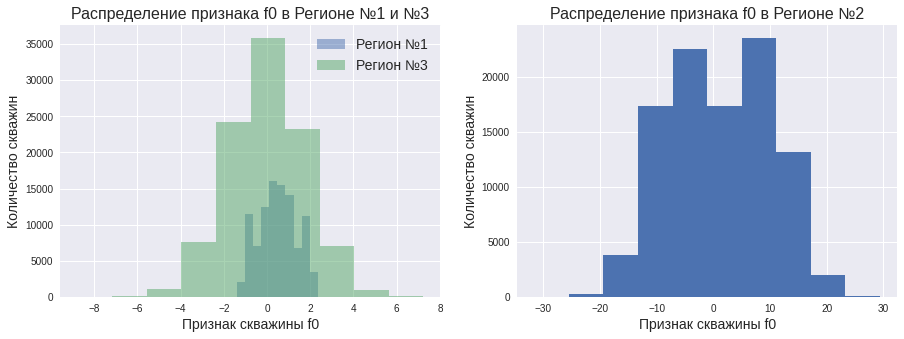

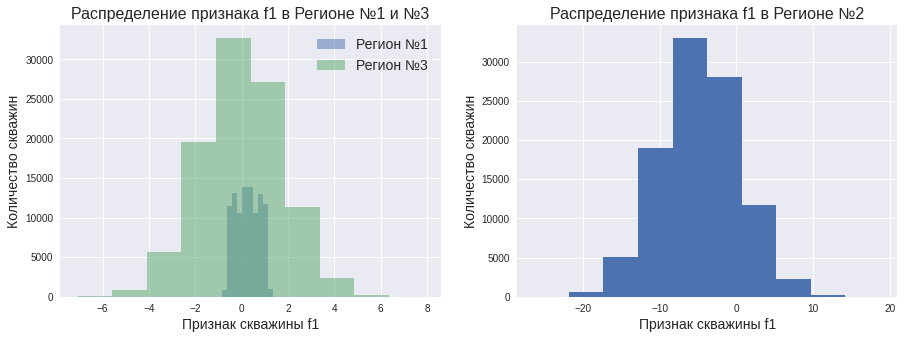

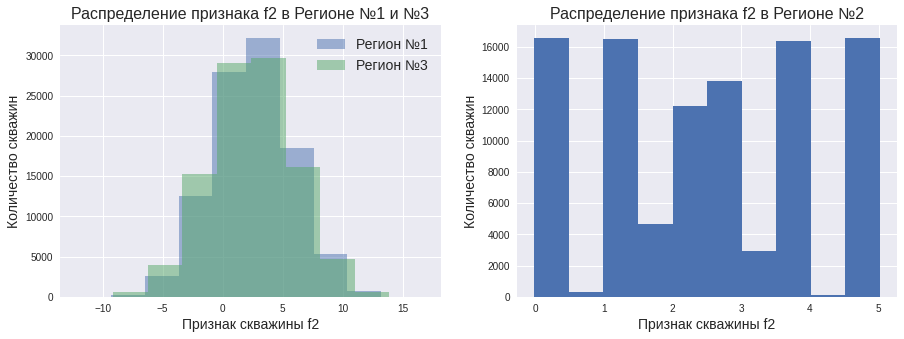

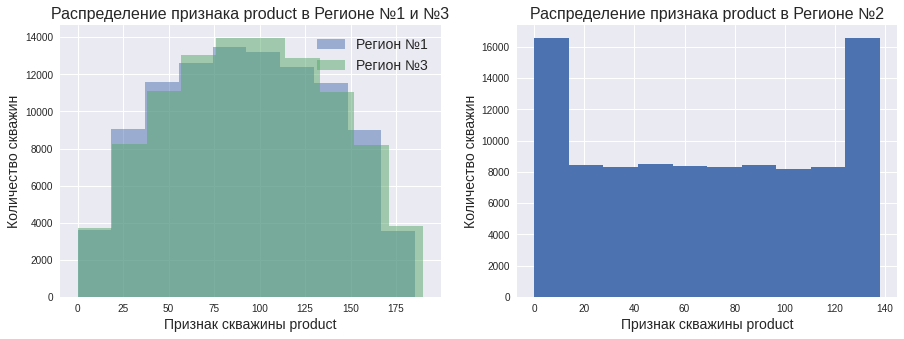

In [46]:
for col in ['f0', 'f1', 'f2', 'product']:   
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    # Слева строим график для регионов 1 и 3
    for data in [data1, data3]:
        ax = data[col].plot(ax=axes[0],  kind='hist', alpha=0.5)                      
    
    ax.set_title(f"Распределение признака {col} в Регионе №1 и №3", fontsize = 16) 
    ax.set_xlabel(f"Признак скважины {col}", fontsize = 14)
    ax.set_ylabel("Количество скважин", fontsize = 14)
      
    ax.legend(["Регион №1", "Регион №3"], fontsize=14)    
    
    # Справа строим график для региона 2
    ax = data2[col].hist(ax=axes[1]) 
    ax.set_title(f"Распределение признака {col} в Регионе №2", fontsize = 16)
        
    ax.set_xlabel(f"Признак скважины {col}", fontsize = 14)
    ax.set_ylabel("Количество скважин", fontsize = 14)
    
    plt.show()

**Вывод 2**

Мы имеем данные о `100 000 скважинах` в каждом из регионов.


Характеристики скважин в **Регионе №2** сильно отличаются от остальных.

>`Product`:
- В регионах №1 и №3 распределения объемов нефти (`product`) близки к нормальному и практически совпадают.


- В регионе №2 сильно преобладают скважины с минимальными и максимальными объемами запасов нефти.


- При этом максимальные запасы в скважинах ~ 137 тыс., а в регионах №1,3  - 190 тыс. баррелей

>Характеристики `f0` и `f1`:

Параметры имеют примерно одинаковые диапазоны. В каждом регионе он свой, условно можно разделить по убыванию:

- Регион №2 - (-20, 20)
- Регион №3 - (-6, 6)
- Регион №1 - (-2, 2)

>Характеристика `f2`:

- В регионах №1 и №3 имеет **одинаковое распределение** и ~ диапазон (-10, 15)


- В регионе №2 **много выбросов** и более узкий диапазон (0, 5). Для скважин характерны лишь определенные признаки.
Именно этим объясняется отличие распределения объемов нефти в скважинах?

=================

Возможно, в Регионе №2 есть какие-то особенности месторождений. Такие нюансы можно уточнить только у экспертов.

Делаем вывод, что для **предсказания объемов нефти** в скважинах требуется построить  **отдельную модель** для каждого региона.

Посмотрим, требуется ли какая-то предобработка для данных.

In [47]:
print("Пропуски в данных:")
for i in [data1, data2, data3]:    
    print(data.isna().sum())

Пропуски в данных:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


**Вывод 3**

Данные очищены, как хороший нефтяной продукт:) Можем двигаться к постановке задачи.

## Формализация задачи и план работы

Итак, имея данные о скважинах мы можем построить модели для предсказания **объемов нефти в скважине**.

А как связать этот показатель с бизнес-задачей и **прибылью в регионе**?

======================================================

В целом в нефтяных компаниях используется такой подход:

1. В избранном регионе ищут месторождения, для каждого определяют значения признаков


2. Строят модель для оценки объемов нефти по имеющимся признакам


3. Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;


4. Прибыль равна суммарной прибыли отобранных месторождений.


Отлично! Теперь для проекта нам не хватает только вводных об **актуальных ценах**, **бюджете** и ограничениях **количества месторождений**.

=======================================================

Вот они, **дополнительные условия**:

- Бюджет на разработку скважин в регионе — `10 млрд рублей`


- При разведке региона `исследуют 500 точек`, из которых с помощью машинного обучения `выбирают 200 лучших` для разработки.


- `Один баррель` сырья приносит `450 рублей дохода`. Доход с каждой единицы `product` составляет 450 тыс. рублей, так как объём указан в тысячах баррелей.

**ПЛАН РАБОТЫ:**

1.Для каждого региона мы построим  и обучим модель с помощью **Линейной Регрессии**:

- Качество модели будем оценивать c помощью `кросс-валидации` и метрики `RMSE`. 

- На валидационной выборке с помощью предсказаний оценим `средний запас сырья`. 

===

2.Подготовимся к **расчету прибыли** в регионах:


- Сравним средний запас сырья в регионе с минимальным `объёмом для безубыточной разработки` новой скважины, и c результатами в п.1.
 
 
- Напишем `функцию  расчета прибыли`, которая выбирает `200 лучших скважин` на основе предсказаний модели и считает прибыль 

===

3.**Смоделируем** использование модели и оценим возможную **прибыль регионов** и **риски** (с помощью `Bootstrap`):
 
- Отбираем `500 случайных точек` в каждом регионе (моделируем разведку) 
 
 
- Отбираем из них `200 лучших`, подсчитываем якобы полученную прибыль. Для этого используем подготовленную функцию, но прибыль считаем не по предсказанным объемам, а по реальным (валидационная выборка).


- Делаем `1000 случайных выборок` с 2-мя пунктами выше и сохраняем полученное `распределение прибылей` из 1000 значений.
 
 
- Найдем `среднюю прибыль`, `95%-й доверительный интервал` и `риск убытков`.

===

4.Предложим Заказчику **регион для разработки скважин**:

- Оставим регионы, в которых вероятность `убытков меньше 2.5%`


- Выберем регион с `наибольшей средней прибылью`

## Подготовка данных для машинного обучения

1. Каждый датасет мы разделим на обучающую и валидационную выборки в соотношении `75 x 25`.

`Валидационную выборку` будем использовать **для оценки прибыли и рисков**, после обучения 3-х моделей.

2. Полученные выборкиc сохраним в словарях, где `reg1`, `reg2` и `reg3` - ключи для соответствующих регионов.

In [48]:
# Словари для хранения переменных для отдельных регионов
X_train = {}
y_train = {}

X_test = {}
y_test = {}

models = {}
predictions = {}

# ключи  регионов для хранения выборок в словарях
reg_keys = ['reg1', 'reg2', 'reg3']

# сюда сохраним метрики наших моделей
models_results = pd.DataFrame(index = ['RMSE_cv', 'RMSE_Test'])

# Для каждого региона свой обучающий и валидационный датасет
for name, data in zip(reg_keys, [data1, data2, data3]):
 
    # Формируем две выборки в соотношении 75x25
    X_train[name], X_test[name], y_train[name], y_test[name] = train_test_split (
                                                                  # идентификаторы нам не понадобятся
                                                                  data.drop(['id', 'product'], axis=1),

                                                                  # целевой показатель - объем нефти
                                                                  data['product'],    
                                                                  test_size=0.25,  
                                                                  random_state=777)
  
    
print("Размер обучающей и тестовой выборки для каждого региона:", X_train['reg1'].shape[0], X_test['reg1'].shape[0])
X_train['reg2'].head(5)

Размер обучающей и тестовой выборки для каждого региона: 75000 25000


,f0,f1,f2
70154,5.641445,-1.848575,2.998460
97712,-2.283211,-2.733342,0.012735
98,11.877073,4.792457,3.001572
23006,7.936629,-1.865652,0.992960
91981,2.888109,1.530264,1.998311


75 000 скважин в нашем распоряжении для кросс-валидации моделей:)

## Построение моделей линейной регрессии

Для каждого региона мы построим  и обучим модель с помощью **Линейной Регрессии**:

- Качество модели будем оценивать c помощью **кросс-валидации** и метрики `RMSE`. 


- На валидационной выборке с помощью предсказаний оценим **средний запас сырья**

Полученные модели сохраним в переменных `model_reg1`, `model_reg2`, `model_reg3`. Названия подходят для регионов и регрессии:)

### Кросс-валидация и оценка RMSE

In [49]:
for reg_key in  reg_keys:
    models[reg_key] = LinearRegression()
    
    # получаем список ошибок для каждого сплита (всего 5)
    error_list = cross_val_score(models[reg_key], X_train[reg_key], y_train[reg_key],
                          scoring='neg_root_mean_squared_error', cv=5) 
    
    # умножаем на (-1), т.к. у нас был neg_rmse и вычисляем среднее по сплитам
    rmse_cv = (error_list * (-1)).mean()     
    
    # сохраняем результат в датафрейм
    models_results[reg_key] = [rmse_cv, np.nan]

# выведем результаты
models_results

,reg1,reg2,reg3
RMSE_cv,37.593417,0.890173,39.998921
RMSE_Test,NaN,NaN,NaN


**Вывод 1**

- Интересно, особенности данных в разных регионах нашли свое отражение и в качестве моделей:)

- **Регионы 1 и 3** имеют одинаковый высокий уровень ошибок, а **регион 2** - снова белая ворона, предсказания почти идеальны.

- С учетом того, что в регионах **~одинаковый диапазон** целевого признака `target`, такая разница существенна.

Посмотрим, как сходятся наши модели на графиках `learning_curve`

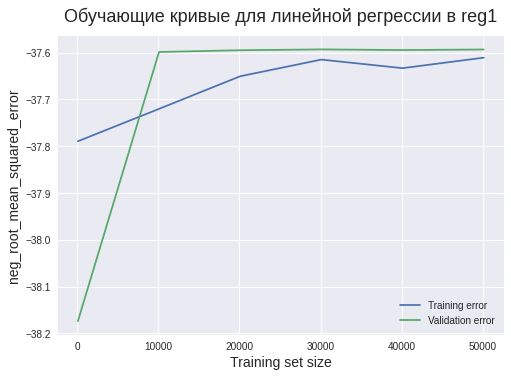

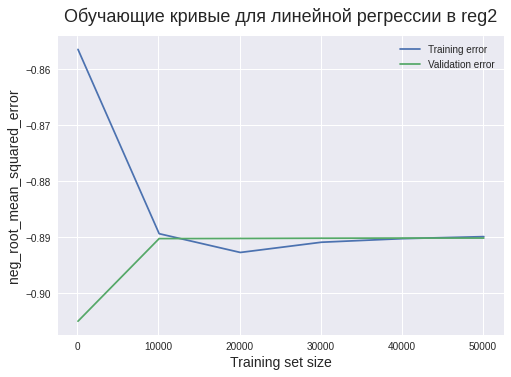

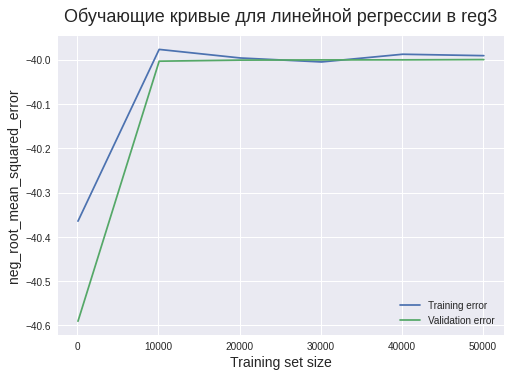

In [50]:
train_sizes = range(100, 60000, 10000)

for reg_key in  reg_keys:
    plot_learning_curve (f"Обучающие кривые для линейной регрессии в {reg_key}",
                         models[reg_key], X_train[reg_key], y_train[reg_key],
                         'neg_root_mean_squared_error', train_sizes) 


**Вывод 2**

Интересная картина, похоже нашим моделям достаточно `10000 данных`, а дальше они не обучаются. Возможно мы узнаем еще какие-то инсайты, чтобы объяснить такую закономерность.

Следующим шагом мы, тем не менее, обучим модели на исходной обучающей выборке и **сохраним предсказания**

### Оценка среднего запаса сырья (предсказания на тестовых данных)

In [51]:
print("Предсказания на тестовой выборке:")
for reg_key in  reg_keys:
    
    # Обучаем все модели на полной обучающей выборке
    models[reg_key].fit(X_train[reg_key], y_train[reg_key])
    
    # Сохраняем предсказания
    predictions[reg_key] =  models[reg_key].predict(X_test[reg_key])
    print(predictions[reg_key])
    
    # Переводим в Series, сохраняя ИНДЕКСЫ как в массиве y_test с реальными данными
    predictions[reg_key] = pd.Series(predictions[reg_key], index=y_test[reg_key].index)

Предсказания на тестовой выборке:
[ 73.60222324  79.13151182 122.03324606 ...  84.88963706  86.08721232
 114.39343483]
[  2.59952411  56.04040891 109.73636543 ...  27.03308863 136.89581197
 111.39344413]
[119.37529972  97.67154029  70.91441908 ... 121.53453428  81.12434294
  96.15755006]


Теперь мы можем оценить **средний запас сырья**, который модель предсказывает в каждом регионе. 

In [52]:
print("Cредний запас предсказанного сырья в регионах (тестовая выборка):\n")
for reg_key in  reg_keys:
    print(f"{reg_key}| {predictions[reg_key].mean(): .3f} тысяч баррелей")
    
print()

print("Реальные запасы сырья в регионах (тестовая выборка):\n")
for reg_key in  reg_keys:
    print(f"{reg_key}| {y_test[reg_key].mean(): .3f} тысяч баррелей")

Cредний запас предсказанного сырья в регионах (тестовая выборка):

reg1|  92.717 тысяч баррелей
reg2|  69.750 тысяч баррелей
reg3|  94.978 тысяч баррелей

Реальные запасы сырья в регионах (тестовая выборка):

reg1|  92.902 тысяч баррелей
reg2|  69.751 тысяч баррелей
reg3|  94.861 тысяч баррелей


**Вывод**

- С учетом одинакового количества скважин и схожего распределения объемов нефти в скважинах, мы получили `почти равные` средние запасы нефти в **регионах 1 и 3**.


- В регионе 2 запасов меньше, зато предсказываем мы их в разрезе скважин лучше:)


- Интересная закономерность. `RMSE` предсказаний для конкретной скважины  хуже в регионах 1 и 3 почти **в 40 раз** (чем в регионе 2). А показатели **средних запасов в целом по региону** почти `с нулевой ошибкой` во всех регионах!


### RMSE на тестовой выборке

- Прежде чем делать оценку ошибок, попробуем нарисовать **графики предсказаний и реальные данные** о запасах нефти для  тестовой выборки скважин.


- Для визуализации возьмем только `10 000 скважин`. 

Интересно, как общая картина ошибок в конечном итоге отразится `на показателе RMSE`и увидим ли отличия `между регионами`

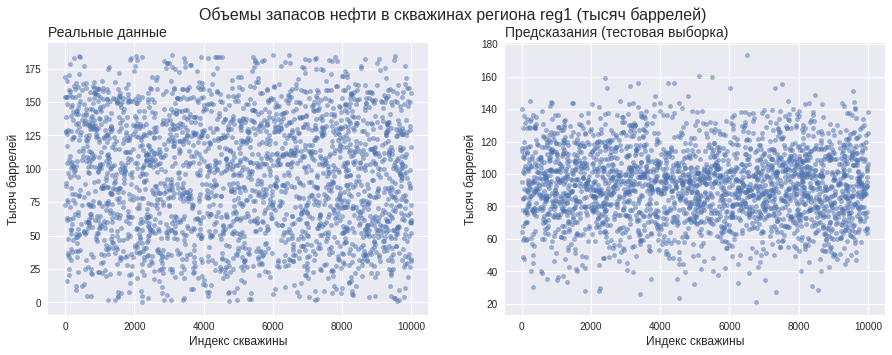

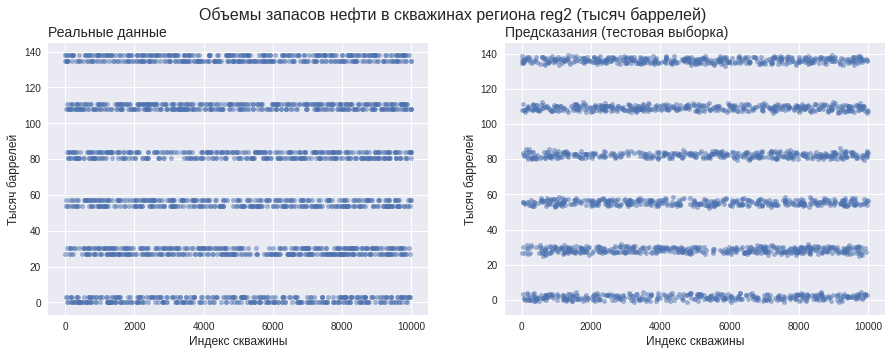

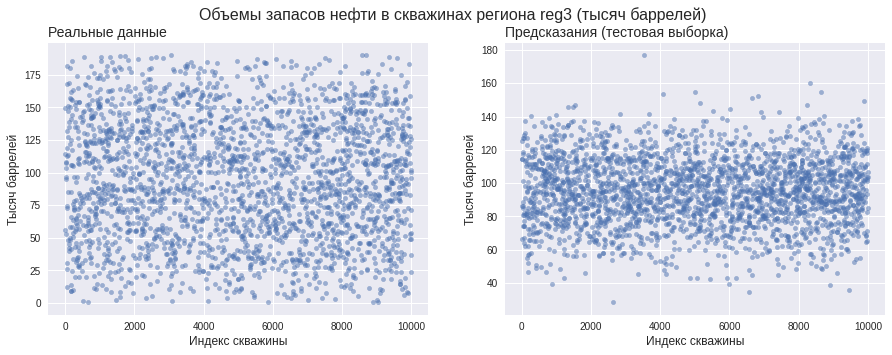

In [53]:
for reg_key in  reg_keys:
    
    # Делаем два графика
    # Слева - реальные данные, Справа - предсказания запасов нефти
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    #Общее название - регион скважин
    fig.suptitle(f"Объемы запасов нефти в скважинах региона {reg_key} (тысяч баррелей)", size=16)
    
    for i, data, data_name, in zip ([0,1], 
                                     [y_test, predictions], 
                                     ["Реальные данные", "Предсказания (тестовая выборка)"]):
        ax = (data[reg_key]
                 # переводим в датафрейм для scatter
                 .rename('product').reset_index()

                  #берем только 10 000 скважин
                 .query("index < 10000")
                 .plot(ax=axes[i], x="index", y="product", kind="scatter", alpha=0.5)
             )         
          
        ax.set_title(data_name, loc='left', fontsize = 14) 
        ax.set_xlabel(f"Индекс скважины", fontsize = 12)
        ax.set_ylabel("Тысяч баррелей", fontsize = 12)   
#         plt.show()
 
    plt.show() 
 

**Вывод 1**

- На графиках можно увидеть, что в **регионе №1** более четкие "тренды" объемов нефти в скважинах. Это подтверждает `равномерное распределение`, которое мы видели в начале проекта.


- Видимо поэтому здесь **линейная регрессия** оказалась вовремя и по делу, показав высокие результаты:)

Похоже, на тестовой выборке результаты RMSE должны быть близки к кросс-валидации. Проверим!

In [54]:
for reg_key in  reg_keys:  
    mse = mean_squared_error(predictions[reg_key], y_test[reg_key])
    rmse = mse ** 0.5 # вычисляем корень из MSE = RMSE
  
    # сохраняем rmse на тестовой выборке в датафрейм
    models_results[reg_key].iloc[1] = rmse
#     df['col'].iloc[0]

# сравним rmse на кросс-валидации и тестовой выборке
models_results

,reg1,reg2,reg3
RMSE_cv,37.593417,0.890173,39.998921
RMSE_Test,37.992193,0.891151,40.230187


**Вывод 2**

1. `RMSE` на тестовой выборке почти **не отличается** от результатов на кросс-валидации. Такой тренд мы уже отметили на обучающих кривых. 


2. `Логическая регрессия` - линейная модель, и видимо ее **качество** на имеющихся данных почти **не меняется** (в зависимости от объема  и набора обучающих данных). Возможно результат также связан с тем, что данные - синтетические.


3. Визуализация `scatter` позволяет хорошо увидеть, откуда растут ноги `RMSE`. В регионах 1 и 3 - `ошибка ~ 40 тысяч баррелей`. Если посмотреть на график, то **полоса предсказаний** сузилась чем реальные данные на столько же позиций:
    - (50, 150) в регионе 1
    - (60, 140) в регионе 3

## Подготовка к расчету прибыли в регионах

Подготовимся к **расчету прибыли** в регионах:


- Сравним средний запас сырья в регионе  с минимальным `объёмом для безубыточной разработки` новой скважины
 
 
- Напишем `функцию  расчета прибыли`, которая выбирает `200 лучших скважин` на основе предсказаний модели и считает прибыль 


###  Возможности  для безубыточной разработки

В п.4.2 мы уже получили средние показатели запасов на тестовой выборке:

- reg1|  92.902 тысяч баррелей
- reg2|  69.751 тысяч баррелей
- reg3|  94.861 тысяч баррелей

Какой минимальный объем нефти должен оказаться в скважине, чтобы добиться **убытка = 0**?

- Средний бюджет на 1 скважину = Бюджет / Количество точек  
- Прибыль от разработки скважины = Объем запасов в скважине (`Product`) * Прибыль с единицы продукта

`Убыток = Средний бюджет - Прибыль на разработку`

Вспомним условия, которые мы сформировали в п.2: 
- Общий бюджет на разработку в регионе - `10 млрд рублей`
- Максимальное количество скважин для исследования - `200 лучших точек`. Их отбирает наша модель.
- Доход с каждой единицы продукта -  `450 тыс. рублей`

In [55]:
REGION_BUDGET = 10000000000 / 1000
WELLS_MAX_NUMBER = 200
ONE_PRODUCT_REVENUE = 450

WELL_BUDGET = REGION_BUDGET / WELLS_MAX_NUMBER

print("Средний бюджет на разработку одной скважины (тыс.руб):", WELL_BUDGET)
print("Прибыль с единицы нефтяного продукта (тыс. руб):", ONE_PRODUCT_REVENUE)
print(f"Необходимый запас нефти в скважине для безубыточной разработки (тыс.баррелей):{(WELL_BUDGET / ONE_PRODUCT_REVENUE): .0f}")
print()

print("Реальные запасы сырья в регионах (тестовая выборка):\n")
for reg_key in  reg_keys:
    product_mean = y_test[reg_key].mean()
    revenue_mean =  product_mean * ONE_PRODUCT_REVENUE - WELL_BUDGET
    print(f"{reg_key}| средний запас: {product_mean: .3f} тыс. баррелей | средняя прибыль: {revenue_mean}")
    


Средний бюджет на разработку одной скважины (тыс.руб): 50000.0
Прибыль с единицы нефтяного продукта (тыс. руб): 450
Необходимый запас нефти в скважине для безубыточной разработки (тыс.баррелей): 111

Реальные запасы сырья в регионах (тестовая выборка):

reg1| средний запас:  92.902 тыс. баррелей | средняя прибыль: -8193.982580863056
reg2| средний запас:  69.751 тыс. баррелей | средняя прибыль: -18611.85935030407
reg3| средний запас:  94.861 тыс. баррелей | средняя прибыль: -7312.405774590559


**Вывод**

1. Если смотреть на средние запасы нефти в скважинах, то в любом из 3-х регионов у нас есть **большой риск получить убытки** от разработки.


2. Делаем, вывод, что нам важно не только **выбрать** сам регион, но и **сами скважины**). `В регионе 1`:
    - Есть пики с самыми **"продуктивными скважинами"**
    - Риски потерь в случае неудачи здесь тоже выше. Большие ставки, хоть и на синтетических данных)

То, насколько хорошо наша модель сможет отбирать перспективные скважины, мы попробуем оценить в п.6. с помощью техники `bootstrap`.

### Расчет прибыли с использованием модели

Все, что формализовали в п.2. и п.5.1. нужно теперь обернуть в хорошую функцию! 

1. Выбераем скважины в регионе с **максимальными значениями** предсказаний.


2. **Суммируем** целевое значение **объёма сырья**, соответствующее этим предсказаниям.


3. Рассчитываем **прибыль** для полученного объёма сырья.


- Для подсчета прибыли на входе `product_predictions` и `product_real_data` будет одинаковый массив предсказаний.

- Для оценки вероятности прибыли (bootstrap) в `product_real_data` - реальные данные целевого признака.

In [56]:
# Сделаем небольшую симуляцию отобора лучших скважин
# Возьмем первый регион

print("5 Скважин с лучшими показателями предсказанного запаса сырья (1й регион):")
best = predictions['reg1'].sort_values(ascending=False)[:5]

display(y_test['reg1'][best.index]
     .rename('real_product')
     .to_frame()
     .join(predictions['reg1'][best.index].rename('product_predictions'))
)

print(f"Общий объем запасов в выбранных скважинах: {y_test['reg1'][best.index].sum(): .2f} тысяч баррелей")

5 Скважин с лучшими показателями предсказанного запаса сырья (1й регион):


,real_product,product_predictions
83095,144.009283,185.608971
52356,123.920559,177.596629
46784,153.639837,176.415406
27658,140.631646,176.103738
78948,162.153488,175.884097


Общий объем запасов в выбранных скважинах:  724.35 тысяч баррелей


**Вывод 1**

- Отлично, все работает. Для скважины с 144 тысячами баррелей модель предсказала 185. +- 40, RMSE предупреждал.


- Для `bootstrap` именно по такому принципу функция будет отбирать скважины на предсказаниях, а потом подсчитывать прибыль уже на реальных данных о запасах в  выбранных скважинах.


- Заметим, что **средний запас нефти** в одной скважине при таком раскладе намного выше, чем если брать весь регион целиком:) Понятно, что мы взяли 5 самых сливок. Но именно так сработает и отбор 200 лучших скважин

Таким образом, **риски** в п.5.1. действительно могут быть **скомпенсированы выбором скважин** с самыми большими запасами.

In [57]:
def region_revenue(product_real_data, product_predictions, max_wells_number, one_product_revenue, region_budget):
    '''
    region_budget - бюджет для разработки в регионе
    one_product_revenue - ревенью с единицы продукта
    product_predictions - предсказания (по ним будут ранжироваться скважины)
    product_real_data - запас нефти в скважинах (индексация должна совпадать с product_predictions)
    max_wells_number - максимальное количество скважин, которое можем отобрать для исследования < len(product_predictions)
    '''
    sum_product = 0
    revenue = 0
        
    # Оставляем только лучшие скважины (с наибольшими запасами)
    # Сортируем по убыванию  
    best_predictions = product_predictions.sort_values(ascending=False)
    best_real_data = product_real_data[best_predictions.index][:max_wells_number]
    
   
    # Вычисляем суммарный объем запасов
    # На выбранных скважинах
    sum_product =  best_real_data.sum()  
  
    # Подсчитываем прогнозируемую прибыль
    revenue =  sum_product * one_product_revenue - region_budget
    
    return revenue, sum_product

Проверить работу функции мы можем **на тестовой выборке**. Все входные параметры зафиксированы в п.5.1

In [58]:
print("==> Прибыль по 200 лучшим скважинам в регионе. Тестовая выборка <==\n")
print("Выбор скважин - на предсказаниях, оценка прибыли и запасов - на реальных данных:\n")
for reg_key in  reg_keys:    
    
    revenue, sum_product = region_revenue(product_real_data = y_test[reg_key], # реальные данные по запасам
                            product_predictions= predictions[reg_key], 
                            max_wells_number = WELLS_MAX_NUMBER, 
                            one_product_revenue = ONE_PRODUCT_REVENUE, 
                            region_budget = REGION_BUDGET)
    
    print(f"{reg_key} | прибыль: {revenue: .2f} тыс. рублей | сумма запасов: {sum_product: .2f}") 

print()
    
print("Выбор скважин - на предсказаниях, оценка прибыли и запасов - на предсказаниях:\n")
for reg_key in  reg_keys:    
    
    revenue, sum_product = region_revenue(product_real_data = predictions[reg_key], # предсказания запасов
                            product_predictions= predictions[reg_key], 
                            max_wells_number = WELLS_MAX_NUMBER, 
                            one_product_revenue = ONE_PRODUCT_REVENUE, 
                            region_budget = REGION_BUDGET)
    
    
    print(f"{reg_key} | прибыль: {revenue: .2f} тыс. рублей | сумма запасов: {sum_product: .2f}") 

==> Прибыль по 200 лучшим скважинам в регионе. Тестовая выборка <==

Выбор скважин - на предсказаниях, оценка прибыли и запасов - на реальных данных:

reg1 | прибыль:  3428943.54 тыс. рублей | сумма запасов:  29842.10
reg2 | прибыль:  2415086.70 тыс. рублей | сумма запасов:  27589.08
reg3 | прибыль:  2272190.44 тыс. рублей | сумма запасов:  27271.53

Выбор скважин - на предсказаниях, оценка прибыли и запасов - на предсказаниях:

reg1 | прибыль:  4054268.03 тыс. рублей | сумма запасов:  31231.71
reg2 | прибыль:  2486946.45 тыс. рублей | сумма запасов:  27748.77
reg3 | прибыль:  3345932.47 тыс. рублей | сумма запасов:  29657.63


**Вывод 2**

1. Наша модель сильно приукрасила итоговую прибыль только в регионах 1 и 3. Такую погрешность предсказывал RMSE.


2. Выбрав 200 лучших скважин из 25000 скважин в тестовой выборке мы компенсировали риски, связанные с **убыточностью большинства скважин**.


3. Можно заметить, что **в регионе 2** общая прибыль обогнала регион 3. Хотя средние показатели в п.5.1 давали нам совершенно другую картину. 


4. Сумма запасов 27589  тыс. баррелей значает, что мы отобрали в регионе 2 `200 скважин` со средним запасом сырья в **137 тыс.баррелей**. Этот показатель **выше, чем в среднем по всему региону**. В целом данные о прибыли выглядят корректными.

Переходим к самому важному этапу оценки рисков и выбору лучшего региона.

## Оценка вероятности прибыли и рисков  (bootstrap) в регионах

**Смоделируем** использование модели и оценим возможную **прибыль регионов** и **риски** (с помощью `Bootstrap`):
 
- Отбираем `500 случайных точек` в каждом регионе (моделируем разведку) 
 
 
- Отбираем из них `200 лучших`, подсчитываем якобы полученную прибыль. Для этого используем подготовленную функцию, но прибыль считаем не по предсказанным объемам, а по реальным (валидационная выборка).


- Делаем `1000 случайных выборок` с 2-мя пунктами выше и сохраняем полученное `распределение прибылей` из 1000 значений.
 
 
- Найдем `среднюю прибыль`, `95%-й доверительный интервал` и `риск убытков`.

In [59]:
def bootstrap_region(predict_data, real_data, subsample_size, bootstrap_size):
    '''
    Генерирует распределение значений прибыли техникой bootstrap 
    отбирает случайным образом скважины для разработки (количество = subsample_size)
    
    1. отбор лучших скважин - на предсказаниях  predict_data (количество = WELLS_MAX_NUMBER < subsample_size)
    2. оценка прибыли и запасов - на реальных данных real_data
    
    повторяет процедуру заданное количество раз - bootstrap_size
    
    возвращает распределение прибыли (Series, размер = bootstrap_size)
    '''
    state = np.random.RandomState(12345) # чтобы набор скважин для разведки был каждый раз разный
    revenue_values = []
          
    for i in range(bootstrap_size):
        
        # моделируем выбор скважин для разведки (количество = subsample_size)
        # индекс после sample сохраняется прежним (т.к. ignore_index по умолчанию)
        predict_subsample = predict_data.sample(n=subsample_size, replace=True, random_state=state)      
        real_subsample = real_data[predict_subsample.index]   
       
        # вычисляем  общую потенциальную прибыль 
        # на лучших скважинах, отобранных моделью (количество = WELLS_MAX_NUMBER)
        revenue, sum_product = region_revenue(
                                product_real_data =  real_subsample, # реальные данные
                                product_predictions = predict_subsample, # предсказания запасов
                                max_wells_number = WELLS_MAX_NUMBER, 
                                one_product_revenue = ONE_PRODUCT_REVENUE, 
                                region_budget =  REGION_BUDGET)
       
        revenue_values.append(revenue)
    
    # Распределение прибыли (количество значений =  bootstrap_size)
    revenue_values = pd.Series(revenue_values) 
    
    return revenue_values

# Запускаем процедуру bootstrap  для каждого региона
# Cохраняем полученные распределения
regions_bootstrap_revenue = {}
for reg_key in  reg_keys:     
     
    # Из общего датасета случайным образом отбираем 500 скважин 
    # Повторяем процедуру bootstrap 1000 раз
    revenue_values = bootstrap_region(predictions[reg_key], y_test[reg_key], 500, 1000)        
    regions_bootstrap_revenue[reg_key] = revenue_values

In [60]:
print(f"===> Оценка ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА и РИСКОВ для ПРИБЫЛИ в регионах <===\n")
for reg_key in  reg_keys:  
    
    print(f"=Регион {reg_key}=")   
       
    # 95-й доверительный интервал. 0.025 с одной стороны, и с другой 
    # Вероятность прибыли < lower_risk = 2.5%
    lower_risk =  regions_bootstrap_revenue[reg_key].quantile(0.025)  
    upper = regions_bootstrap_revenue[reg_key].quantile(0.975) 
    
    # вероятность убытков
    # доля случаев с отрицательной прибылью
    risk = (regions_bootstrap_revenue[reg_key] < 0).mean()
    
    print(f"Средняя выручка:{ regions_bootstrap_revenue[reg_key].mean():.0f} тыс.руб.",
          f"| 95-й дов.интервал: ({lower_risk:.0f},{upper:.0f}) |",
          f"Риск убытков: {risk:.2%}")
    print()

===> Оценка ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА и РИСКОВ для ПРИБЫЛИ в регионах <===

=Регион reg1=
Средняя выручка:489853 тыс.руб. | 95-й дов.интервал: (-51506,1046143) | Риск убытков: 3.70%

=Регион reg2=
Средняя выручка:580255 тыс.руб. | 95-й дов.интервал: (189417,980093) | Риск убытков: 0.20%

=Регион reg3=
Средняя выручка:393944 тыс.руб. | 95-й дов.интервал: (-136530,958346) | Риск убытков: 8.00%



## Общий вывод

Предложим Заказчику **регион для разработки скважин**:

   - Оставим регионы, в которых вероятность `убытков меньше 2.5%`
   - Выберем регион с `наибольшей средней прибылью`

1. 1-му условию не удовлетворяют  **регион №3** и **регион №1**, здесь доля случаев с отрицательной прибылью `3.7% и 8%`. соответственно.

 - Полученный 95% доверительный интервал также сразу позволяет ответить на вопрос, в каком регионе отрицательные значения будут с вероятностью меньше 2.5%. 

 - Т.к. **нижняя граница**  интервала  **отрицательна** в регионах 1 и 3, значит, мы уже имеем 2.5%  случаев < 0.
 

2. Наибольшая средняя прибыль в **регионе №2**. В целом наша гипотеза с выбором фаворита подтвердилась) 


3. Приятный бонус, в выбранном регионе наша модель предсказывает запасы сырья в скважинах с достаточно низким уровнем ошибок `RMSE = 0.89`

Бизнес-цель на синтетических данных достигнута)